<a href="https://colab.research.google.com/github/rodriquiel/concrete_images_classifier/blob/main/Clasificador_imagenes_hormigon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de imagenes de hormigon

El siguiente clasificador permite saber a traves del uso de imagenes si una determinada seccion de hormigón se encuentra agrietado o no.
El modelo  ofrece varias ventajas, especialmente en contextos de ingeniería civil, construcción y mantenimiento de infraestructuras, entre las cuales se destacan:

* **Detección Temprana de Daños:** Un modelo de clasificación puede identificar grietas en el hormigón de manera rápida y precisa, permitiendo la detección temprana de problemas estructurales antes de que se conviertan en fallos mayores.

* **Eficiencia en la Inspección:** Automáticamente clasificar imágenes de estructuras de hormigón agiliza el proceso de inspección, reduciendo el tiempo y esfuerzo necesarios en comparación con inspecciones manuales.

* **Consistencia y Precisión:** A diferencia de la inspección visual manual, que puede ser subjetiva y variar entre inspectores, un modelo de clasificación de imágenes proporciona resultados consistentes y precisos.

* **Reducción de Costos:** Al automatizar la detección de grietas, se reduce la necesidad de inspecciones manuales frecuentes, lo que disminuye los costos operativos y de mantenimiento.

* **Monitorización Continua:** Se puede implementar un sistema de monitoreo continuo utilizando cámaras y el modelo de clasificación, permitiendo un seguimiento constante del estado de la infraestructura.

* **Prevención de Riesgos:** Al identificar y clasificar las grietas con precisión, se pueden tomar medidas preventivas más eficaces, reduciendo el riesgo de colapso o fallos estructurales.

* **Mejora en la Planificación del Mantenimiento:** La capacidad de identificar y clasificar el tipo y la gravedad de las grietas permite priorizar las reparaciones y planificar el mantenimiento de manera más efectiva.

* **Documentación y Reportes:** El modelo puede integrarse en sistemas de gestión de activos para documentar automáticamente las condiciones de las estructuras, facilitando la generación de reportes y el seguimiento del estado de las mismas a lo largo del tiempo.

## Uso del clasificador

Para poder utilizar el clasificador deben seguirse los siguientes pasos, con el fin de poder un rendimiento optimo del mismo:

**Ejecucion desde Colab Notebook**
1.  importe la o las imagenes a clasificar. Se recomienda que las mismas tengan un tamaño de 224x224 antes de ser importadas para un mejor rendimiento del modelo. Caso contrario, el programa se encargará de escalar sus iamgenes.
2.  En la celda *Carga Imagen* asigne a la variable ruta el nombre del archivo o carpeta de archivos que se busca clasificar. Debe colocarse entre comillas simples para evitar errores de ejecucion. Para copiar correctamente la celda, importe la iamgen al colab y haciendo click en los tres puntos a la derecha copie la ruta de la misma.
3.  Seleccione la celda debajo de *Importacion librerias a utilizar* y luego desde entorno de ejecucion, oprima click en la opcion **Ejecutar celda seleccionada y siguientes**. Tambien puede ejecutar a partir de la celda seleccionada pulsando **ctrl+F10**
4.  En la ultima celda del notebook vera el resultado de clasificacion de sus imagenes.

# Importacion librerias a utilizar y modelo

In [ ]:
!pip install skillsnetwork

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 2.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
!pip install Pillow

In [42]:
import numpy as np
import keras
import skillsnetwork
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import requests
import gdown
import os

In [43]:
num_classes = 2
image_resize = 224
batch_size = 100

In [44]:
file_id = "1KWBGnyN6owjOhj7sm_TWVQ7AwKFjydtA"
destination = '/content/classifier_resnet_model.keras'
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

if os.path.exists(destination):
    file_size = os.path.getsize(destination)
    print(f"Archivo descargado correctamente, tamaño del archivo: {file_size} bytes.")

    if file_size > 0:
        try:
            model = keras.models.load_model(destination)
            print("Modelo cargado exitosamente.")
        except Exception as e:
            print(f"Error al cargar el modelo: {e}")
    else:
        print("Error: El archivo parece estar vacío.")
else:
    print("Error: El archivo no se ha descargado correctamente.")

Downloading...
From (original): https://drive.google.com/uc?id=1KWBGnyN6owjOhj7sm_TWVQ7AwKFjydtA
From (redirected): https://drive.google.com/uc?id=1KWBGnyN6owjOhj7sm_TWVQ7AwKFjydtA&confirm=t&uuid=63b1933f-0021-4997-a15a-8ed9750aadba
To: /content/classifier_resnet_model.keras
100%|██████████| 95.0M/95.0M [00:02<00:00, 36.5MB/s]


Archivo descargado correctamente, tamaño del archivo: 95036742 bytes.
Modelo cargado exitosamente.


In [45]:
model = load_model('classifier_resnet_model.keras')

# Carga Imagen

Ingresar aqui ruta de la imagen

In [63]:
# Ingrese dentro de las comillas simples la ruta de la imagen
ruta_imagen = '/content/00032.jpg'

# Clasificacion Imagen

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
image = load_img(ruta_imagen, target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = preprocess_input(image_array)

In [66]:
predictions = model.predict(image_array)
predictions = np.squeeze(predictions, axis=1)
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [67]:
predicted_class

array([0])

In [68]:
predicted_classes = np.argmax(predictions, axis=1)

# Resultados

In [69]:
if predicted_classes[0] == 1:
    print("La imagen contiene grietas.")
else:
    print("La imagen no contiene grietas.")

La imagen no contiene grietas.


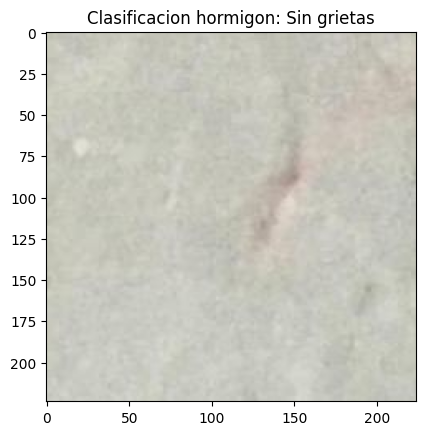

In [71]:
plt.imshow(image)
plt.title(f'Clasificacion hormigon: {"Grietas" if predicted_class[0] == 1 else "Sin grietas"}')
plt.show()
